# КЛАССИФИКАЦИЯ С ПОМОЩЬЮ ПЕРСЕПТРОНА


Цель работы: изучение модели нейрона персептрона и архитектуры персептронной однослойной нейронной сети; создание
и исследование моделей персептронных нейронных сетей

In [18]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [19]:
np.random.seed(13)

bias = 0.4
# Класс 1: точки вокруг (0, 0)
class0 = np.random.randn(15, 2) * bias + np.array([0, 0])
# Класс 1: точки вокруг (1, 1)
class1 = np.random.randn(10, 2) * bias + np.array([1, 1])
# Класс 2: точки вокруг (-1, -1)
class2 = np.random.randn(10, 2) * bias + np.array([-1, -1])

# Объединение данных
X_train = np.vstack([class0, class1, class2])
y_train = np.hstack([
    np.zeros(15, dtype=int),
    np.ones(10, dtype=int),
    np.full(10, 2, dtype=int)  
])

In [20]:
# One-hot encoding для выходов
encoder = OneHotEncoder(sparse_output=False)
y_train_oh = encoder.fit_transform(y_train.reshape(-1, 1))

# Преобразование в тензоры PyTorch
X_tensor = torch.FloatTensor(X_train)
y_tensor = torch.FloatTensor(y_train_oh)


In [21]:
class Perceptron(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    def forward(self, x):
        return self.linear(x)


In [22]:
model = Perceptron(2, 3)
model.train()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
criterion = nn.MSELoss()

for epoch in range(50):
    optimizer.zero_grad()
    output = model(X_tensor)
    loss = criterion(output, y_tensor)
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print(f"Эпоха {epoch+1}, MSE: {loss.item():.6f}")

Эпоха 10, MSE: 0.237331
Эпоха 20, MSE: 0.160761
Эпоха 30, MSE: 0.142611
Эпоха 40, MSE: 0.137491
Эпоха 50, MSE: 0.135510


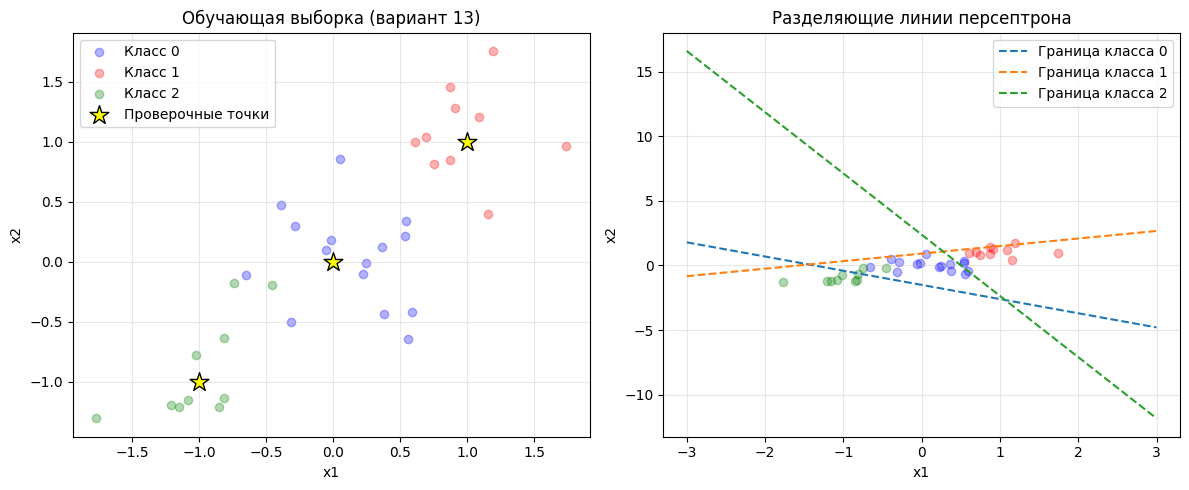

In [26]:
# Визуализация разделяющих линий
plt.figure(figsize=(12, 5))

# Исходные данные
plt.subplot(1, 2, 1)
plt.scatter(class0[:, 0], class0[:, 1], c='blue', label='Класс 0', alpha=0.3)
plt.scatter(class1[:, 0], class1[:, 1], c='red', label='Класс 1', alpha=0.3)
plt.scatter(class2[:, 0], class2[:, 1], c='green', label='Класс 2', alpha=0.3)
plt.scatter([0, 1, -1], [0, 1, -1], c='yellow', edgecolors='black', 
            s=200, marker='*', label='Проверочные точки', zorder=5)
plt.grid(True, alpha=0.3)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Обучающая выборка (вариант 13)')
plt.legend()

# Разделяющие линии
plt.subplot(1, 2, 2)
x_line = np.linspace(-3, 3, 100)
weights = model.linear.weight.detach().numpy()
bias = model.linear.bias.detach().numpy()

for i in range(3):
    # Уравнение разделяющей линии: w1*x1 + w2*x2 + b = 0
    if abs(weights[i, 1]) > 1e-5:
        y_line = (weights[i, 0] * x_line + bias[i]) / weights[i, 1]
        plt.plot(x_line, y_line, '--', label=f'Граница класса {i}')

plt.scatter(class0[:, 0], class0[:, 1], c='blue', alpha=0.3)
plt.scatter(class1[:, 0], class1[:, 1], c='red', alpha=0.3)
plt.scatter(class2[:, 0], class2[:, 1], c='green', alpha=0.3)
plt.grid(True, alpha=0.3)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Разделяющие линии персептрона')
plt.legend()
plt.tight_layout()
plt.show()


In [24]:
# Тестирование на проверочных точках
test_points = torch.FloatTensor([[0, 0], [1, 1], [-1, -1]])
with torch.no_grad():
    predictions = model(test_points)
    print("\nРезультаты классификации проверочных точек (вариант 13):")
    for i, (pt, pred) in enumerate(zip(test_points, predictions)):
        pred_class = torch.argmax(pred).item()
        print(f"Точка {pt.numpy()} → класс {pred_class} (one-hot: {pred.numpy()})")


Результаты классификации проверочных точек (вариант 13):
Точка [0. 0.] → класс 0 (one-hot: [0.41556677 0.2511245  0.28728375])
Точка [1. 1.] → класс 1 (one-hot: [ 0.44248313  0.68518984 -0.16343123])
Точка [-1. -1.] → класс 2 (one-hot: [ 0.38865042 -0.18294084  0.7379987 ])
